In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
    'service-account-file.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [3]:
from google.cloud import bigquery_storage

bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=credentials)

In [4]:
from google.cloud import bigquery

client = bigquery.Client(project="hazel-form-273711", credentials=credentials)

clients=[client, bqstorageclient]

In [5]:
from spade_proto.auxiliary import perform_query
QUERY = ("""SELECT
  Actor2CountryCode,
  MonthYear,
  COUNT(*) AS Count
FROM
  `gdelt-bq.gdeltv2.events`
WHERE
  Year >= 2015
  AND Year <= 2020
  AND Actor1CountryCode = "DEU"
GROUP BY
  Actor2CountryCode,
  MonthYear""")


DEUmonthyear = perform_query(clients=clients, QUERY=QUERY)

In [9]:
print(DEUmonthyear)
DEUmonthyear["Time"] = pd.to_datetime(DEUmonthyear['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

      Actor2CountryCode  MonthYear  Count     Time
0                   KHM     202004      8  2020-04
1                   ZWE     202006     17  2020-06
2                   ISR     202007    388  2020-07
3                   AZE     202008      6  2020-08
4                   DNK     201803    566  2018-03
...                 ...        ...    ...      ...
12149               SDN     202010      8  2020-10
12150               TGO     201505      2  2015-05
12151               LBR     202010      3  2020-10
12152               GAB     201909      2  2019-09
12153               GRD     201902      1  2019-02

[12154 rows x 4 columns]


In [15]:
DEUPOLmonthyear = DEUmonthyear.loc[DEUmonthyear.Actor2CountryCode == 'POL']
print(DEUPOLmonthyear)

      Actor2CountryCode  MonthYear  Count     Time
80                  POL     201508    726  2015-08
776                 POL     201704    521  2017-04
1269                POL     201812    492  2018-12
1366                POL     201511    680  2015-11
1623                POL     201711    716  2017-11
...                 ...        ...    ...      ...
11887               POL     201807    483  2018-07
11899               POL     201612   1218  2016-12
11908               POL     201607   1185  2016-07
12013               POL     201905    621  2019-05
12111               POL     201502    205  2015-02

[72 rows x 4 columns]


                    Count
Time    Country          
2015-01 POL      0.007890
2015-02 POL      0.006092
2015-03 POL      0.004841
2015-04 POL      0.013395
2015-05 POL      0.010798
...                   ...
2020-08 POL      0.007833
2020-09 POL      0.009156
2020-10 POL      0.007598
2020-11 POL      0.008745
2020-12 POL      0.011020

[72 rows x 1 columns]


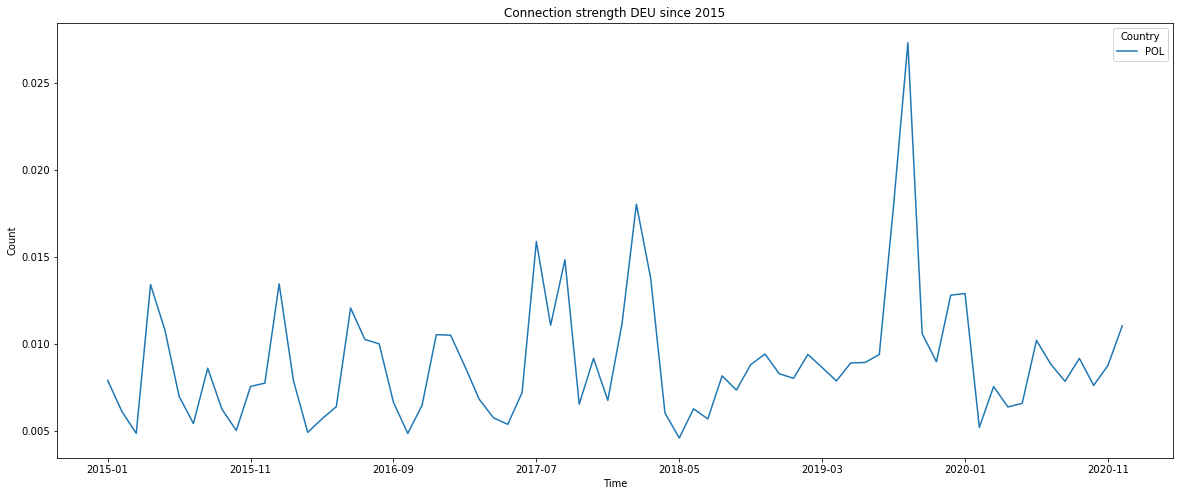

In [16]:
s = DEUPOLmonthyear.groupby(["Time"]).agg({'Count': 'sum'})
t = DEUmonthyear.groupby(["Time"]).agg({'Count': 'sum'})
s['Count'] = s['Count'] / t['Count']
s['Country'] = 'POL'
s = s.groupby(["Time", "Country"]).agg({'Count': 'sum'})
g = s.unstack().plot(y='Count')
g
g.set(ylabel='Count')
g.set_title("Connection strength DEU since 2015")
g.figure.set_size_inches(20, 8)
plt.savefig('DEUconnection.png', bbox_inches='tight')
print(s)
